In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
from tbparse import SummaryReader
import os

In [53]:
log_dir = "logs/finetune_challenge2_1762428653/events.out.tfevents.1762428653.ip-172-31-56-136.3952619.0"

reader = SummaryReader(log_dir)

df = reader.scalars
df.head()

,step,tag,value
0,1,Train/backbone/Active_Mixtures,2.999995
1,2,Train/backbone/Active_Mixtures,2.999979
2,3,Train/backbone/Active_Mixtures,2.941913
3,4,Train/backbone/Active_Mixtures,2.236377
4,5,Train/backbone/Active_Mixtures,1.410307


In [54]:
# consolidate Train/backbone/RMSE and Train/head/RMSE into single column 'train/rmse',
# pivot so each tag becomes a column, and rename 'step' -> 'epoch'
from collections import defaultdict

columns = df['tag'].unique().tolist()
df_wide = df.copy()

df_wide = df_wide.pivot(index='step', columns='tag', values='value').reset_index()
df_wide = df_wide.rename(columns={'step': 'epoch'})

list_col = {}
for col in columns:
    mode, part, metric = col.split('/')
    list_col[col] = f"{mode}_{metric.lower()}"

list_new_col = list(set(list_col.values()))

dataf = {col: [] for col in list_new_col}
dataf['epoch'] = []

for index, row in df_wide.iterrows():
    dataf['epoch'].append(int(row['epoch']))
    for col in columns:
        if not pd.isna(row[col]):
            dataf[list_col[col]].append(row[col])

# import pandas as pd
df_wide = pd.DataFrame(data = dataf, columns = ['epoch'] + list_new_col)
df_wide.head() 

df_wide.to_csv("images/finetune_challenge2.csv", index=False)


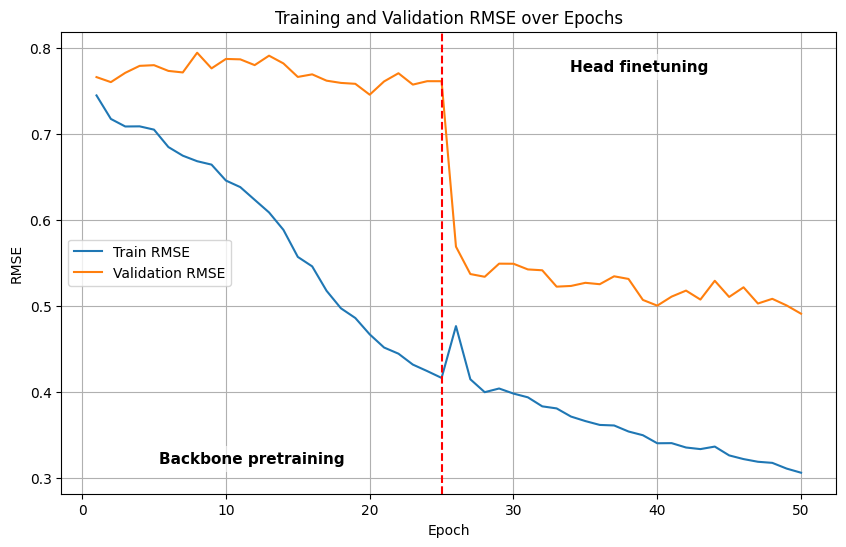

In [55]:
# Plot the rmse 
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_wide, x="epoch", y="Train_rmse", label="Train RMSE")
sns.lineplot(data=df_wide, x="epoch", y="Val_rmse", label="Validation RMSE")
plt.axvline(x = 25, color='red', linestyle='--')

# annotate regions: left of the line = backbone, right = head
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
rng = ylim[1] - ylim[0]

# place left label near the bottom to avoid blocking the curves
left_x = (xlim[0] + 25) / 2
left_y = ylim[0] + 0.06 * rng
ax.text(left_x, left_y, "Backbone pretraining",
        ha="center", va="bottom", fontsize=11, weight="bold",
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

# place right label near the top (or adjust as needed)
right_x = (25 + xlim[1]) / 2
right_y = ylim[1] - 0.06 * rng
ax.text(right_x, right_y, "Head finetuning",
        ha="center", va="top", fontsize=11, weight="bold",
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))


plt.title("Training and Validation RMSE over Epochs")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.grid()

plt.savefig("images/rmse_finetune_challenge2.png", dpi=300)
plt.show()

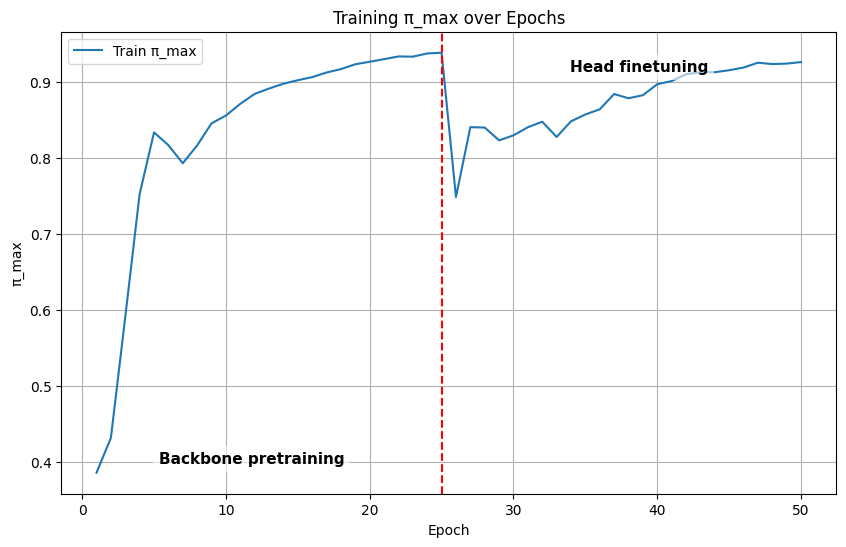

In [56]:
# Plot the rmse 
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_wide, x="epoch", y="Train_π_max", label="Train π_max")
plt.axvline(x = 25, color='red', linestyle='--')

# annotate regions: left of the line = backbone, right = head
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
rng = ylim[1] - ylim[0]

# place left label near the bottom to avoid blocking the curves
left_x = (xlim[0] + 25) / 2
left_y = ylim[0] + 0.06 * rng
ax.text(left_x, left_y, "Backbone pretraining",
        ha="center", va="bottom", fontsize=11, weight="bold",
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

# place right label near the top (or adjust as needed)
right_x = (25 + xlim[1]) / 2
right_y = ylim[1] - 0.06 * rng
ax.text(right_x, right_y, "Head finetuning",
        ha="center", va="top", fontsize=11, weight="bold",
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))


plt.title("Training π_max over Epochs")
plt.xlabel("Epoch")
plt.ylabel("π_max")
plt.legend()
plt.grid()
plt.savefig("images/pi_max_finetune_challenge2.png", dpi=300)
plt.show()

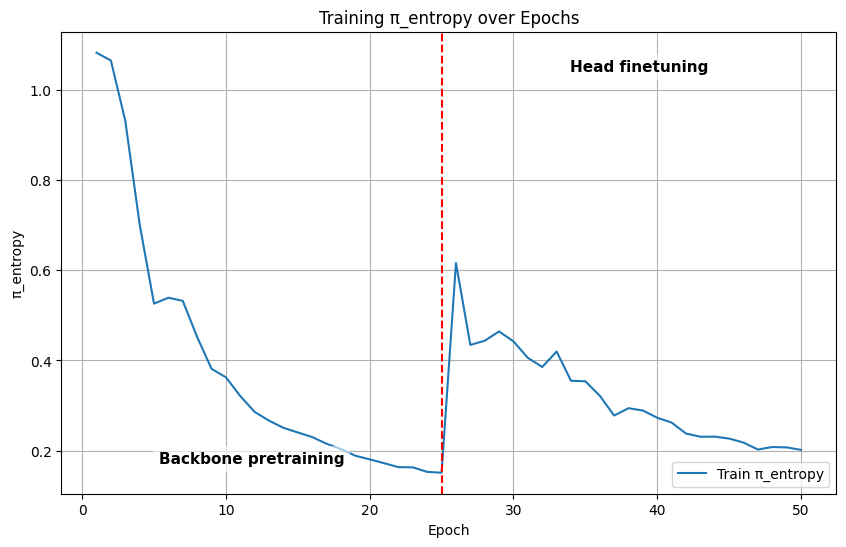

In [57]:
# Plot the rmse 
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_wide, x="epoch", y="Train_π_entropy", label="Train π_entropy")
plt.axvline(x = 25, color='red', linestyle='--')

# annotate regions: left of the line = backbone, right = head
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
rng = ylim[1] - ylim[0]

# place left label near the bottom to avoid blocking the curves
left_x = (xlim[0] + 25) / 2
left_y = ylim[0] + 0.06 * rng
ax.text(left_x, left_y, "Backbone pretraining",
        ha="center", va="bottom", fontsize=11, weight="bold",
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

# place right label near the top (or adjust as needed)
right_x = (25 + xlim[1]) / 2
right_y = ylim[1] - 0.06 * rng
ax.text(right_x, right_y, "Head finetuning",
        ha="center", va="top", fontsize=11, weight="bold",
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))


plt.title("Training π_entropy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("π_entropy")
plt.legend()
plt.grid()
plt.savefig("images/pi_entropy_finetune_challenge2.png", dpi=300)
plt.show()